In [199]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import warnings


warnings.filterwarnings("ignore")

In [200]:
raw_dataset = pd.read_csv('C:\ChiefWarden\Dataset\ClaMP_Integrated-5184.csv')

In [201]:
raw_dataset.columns

Index(['e_cblp', 'e_cp', 'e_cparhdr', 'e_maxalloc', 'e_sp', 'e_lfanew',
       'NumberOfSections', 'CreationYear', 'FH_char0', 'FH_char1', 'FH_char2',
       'FH_char3', 'FH_char4', 'FH_char5', 'FH_char6', 'FH_char7', 'FH_char8',
       'FH_char9', 'FH_char10', 'FH_char11', 'FH_char12', 'FH_char13',
       'FH_char14', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'OH_DLLchar0', 'OH_DLLchar1',
       'OH_DLLchar2', 'OH_DLLchar3', 'OH_DLLchar4', 'OH_DLLchar5',
       'OH_DLLchar6', 'OH_DLLchar7', 'OH_DLLchar8', 'OH_DLLchar9',
       'OH_DLLchar10', 'SizeOfStackReserve', 'SizeO

In [202]:
raw_dataset

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,256,4,1,0,1,...,1,3,0,NoPacker,6.603616,5.443362,1181520,6.627552,1,0
1,144,3,4,65535,184,184,4,1,0,1,...,1,3,0,NoPacker,5.205926,2.123522,7680,5.318221,0,0
2,144,3,4,65535,184,272,5,1,0,1,...,1,4,0,NoPacker,6.238000,3.380859,57872,6.507758,1,0
3,144,3,4,65535,184,184,1,1,0,1,...,0,1,0,NoPacker,0.000000,0.000000,95616,4.575092,1,0
4,144,3,4,65535,184,224,5,1,0,1,...,1,4,0,NoPacker,6.355626,0.702621,48128,5.545531,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,144,3,4,65535,184,216,5,1,1,1,...,0,5,0,NoPacker,6.174602,3.155928,365568,7.546568,0,1
5206,80,2,4,65535,184,256,7,1,0,1,...,4,3,0,NoPacker,0.000000,0.000000,98816,6.947195,0,1
5207,144,3,4,65535,184,216,5,1,0,1,...,2,3,0,NoPacker,6.503422,3.790871,227328,7.823114,0,1
5208,144,3,4,65535,184,248,5,1,1,1,...,1,4,0,NoPacker,6.115208,7.919091,271616,7.886012,0,1


In [203]:
categorical_cols = ['packer_type', 'fileinfo']
for col in categorical_cols:
    print(f"{col}: {raw_dataset[col].unique()}")


packer_type: ['NoPacker' 'Armadillov1xxv2xx' 'NETexecutableMicrosoft' 'NETDLLMicrosoft'
 'VideoLanClient' 'Armadillov171' 'MicrosoftVisualCV80Debug'
 'BobSoftMiniDelphiBoBBobSoft' 'InstallShieldCustom'
 'UPX290LZMAMarkusOberhumerLaszloMolnarJohnReiser'
 'UPXv20MarkusLaszloReiser' 'MinGWGCC3x' 'WiseInstallerStub'
 'MacromediaWindowsFlashProjectorPlayerv60' 'AsCryptv01SToRM5'
 'WinZip32bitSFXv8xmodule' 'MacromediaWindowsFlashProjectorPlayerv50'
 'InstallShield2000' 'UPXProtectorv10x2'
 'UPXV200V290MarkusOberhumerLaszloMolnarJohnReiser'
 'ProtectSharewareV11eCompservCMS' 'PECompactV2XBitsumTechnologies'
 'StelthPE101BGCorp' 'ASProtect13321RegisteredAlexeySolodovnikov'
 'nSpackV2xLiuXingPing'
 'UPX293300LZMAMarkusOberhumerLaszloMolnarJohnReiser' 'AHPack01FEUERRADER'
 'ASPackv212AlexeySolodovnikov' 'PureBasic4xNeilHodgson'
 'Upackv039finalDwing' 'PrivateexeProtector21522XSetiSoftTeam'
 'PECompact2xxSlimLoaderBitSumTechnologies' 'CrunchPE'
 'tElock09910privatetE' 'D1S1Gv11betaD1N' 'Safe20'
 

In [204]:
raw_dataset = pd.get_dummies(raw_dataset, columns=['packer_type'], drop_first=True)
raw_dataset = raw_dataset.astype(int)



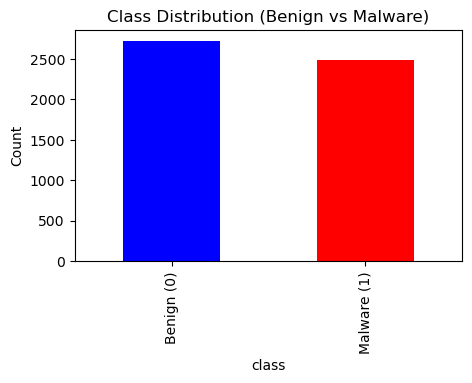

In [205]:
import matplotlib.pyplot as plt

class_counts = raw_dataset['class'].value_counts()
plt.figure(figsize=(5,3))
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title("Class Distribution (Benign vs Malware)")
plt.xticks(ticks=[0,1], labels=['Benign (0)', 'Malware (1)'])
plt.ylabel("Count")
plt.show()


In [206]:
from sklearn.preprocessing import RobustScaler

num_cols = [col for col in raw_dataset.columns if raw_dataset[col].nunique() > 2]

scaler = RobustScaler()
raw_dataset[num_cols] = scaler.fit_transform(raw_dataset[num_cols])



In [207]:
from sklearn.model_selection import train_test_split

X = raw_dataset.drop(columns=["class"])
Y = raw_dataset["class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)



In [212]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb.fit(X_train, Y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [213]:
import xgboost
import sklearn

print("XGBoost Version:", xgboost.__version__)
print("Scikit-learn Version:", sklearn.__version__)


XGBoost Version: 2.1.3
Scikit-learn Version: 1.6.1


In [210]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
print(rf)


RandomForestClassifier()


In [211]:
from sklearn.metrics import accuracy_score, classification_report
Y_pred = rf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Test Accuracy: 0.9923

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       498
           1       0.99      0.99      0.99       544

    accuracy                           0.99      1042
   macro avg       0.99      0.99      0.99      1042
weighted avg       0.99      0.99      0.99      1042

